In [1]:
"""
Assignment III

Due: June 5, 2022. 
Pick a dataset of your choice. From UCI classification datasets 
(https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
Use the RandomForest method for classification. 
Take from UCI dataset from the clustering section and run k-means algorithm on it. 
Submit:
 1) code in Python 
2)  a word file summarizing the result include some measure of performance such as confusion matrix, and accuracy.

Enjoy!!
"""
from google.colab import drive
drive.mount('/content/drive')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/anime.csv", sep=",")
df['episodes'] = pd.to_numeric(df["episodes"], errors='coerce').fillna(1000).astype(int)
df = df.dropna(how="any")
print("\n")
print(f"The whole dataframe looks like:\n {df}.")
print("\n")
print("The dataframe information is: ")
print(f"{df.info()}.")
print("\n")
print(f"The dataframe shape is: {df.shape}.")
X_train = df["rating"]
y_train = df["members"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The whole dataframe looks like:
        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


<bound method Axes.imshow of <matplotlib.axes._subplots.AxesSubplot object at 0x7f2fe120b550>>

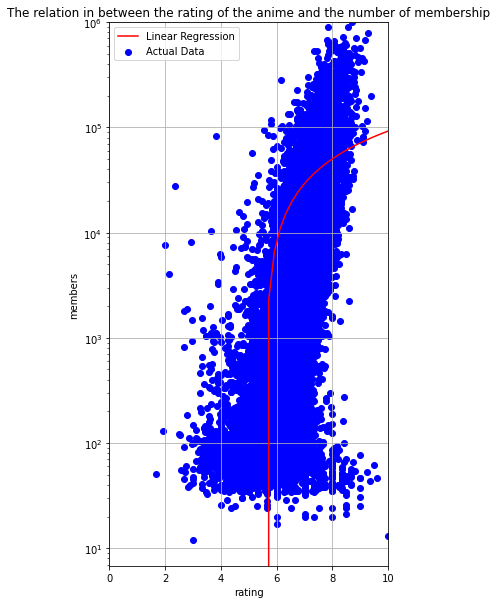

In [2]:
fig, ax = plt.subplots(figsize=(5, 10))
ax.scatter(X_train, y_train, c="blue", label="Actual Data")
ax.set_xlabel("rating")
ax.set_ylabel("members")
ax.set_title("The relation in between the rating of the anime and the number of membership")
from sklearn.linear_model import LinearRegression
X_train = np.array(X_train).reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
intercept = lin_reg.intercept_
gradient = lin_reg.coef_
x0 = np.linspace(0,10)
y0 = x0*gradient+intercept
ax.plot(x0,y0,label="Linear Regression", c='red',)
ax.legend()
ax.axis()
ax.grid(True)
ax.set_xscale("linear")
ax.set_yscale("log") 
ax.set_xlim(0,10)
ax.set_ylim(0,1000000)
ax.imshow
# ax.figure.savefig("The relation in between the rating of the anime and the number of membership")

In [3]:
# random foreset
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=None, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(metrics.classification_report(y_pred_rf , y_test))

              precision    recall  f1-score   support

          20       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          34       0.14      0.05      0.07        22
          35       0.00      0.00      0.00        33
          36       0.00      0.00      0.00        10
          37       0.00      0.00      0.00        19
          38       0.00      0.00      0.00         5
          39       0.00      0.00      0.00        17
          40       0.00      0.00      0.00        13
          41       0.00      0.00      0.00        18
          42       0.00      0.00      0.00        14
          43       0.00      0.00      0.00         0
          44       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1